# Opdracht model-evaluatie

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np

## Opdracht 1

Laad [de borstkanker-dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
) en maak gebruik van `DESCR` om een beeld te krijgen van de gegevens die in deze dataset zijn opgeslagen. zorg ervoor dat je de *features* in een variabele `X` krijgt en de *targets* in de variabele `y` (dit kan op minimaal twee manieren). Je hoeft voor deze opgave geen EDA te maken of de data helemaal op te schonen (mag natuurlijk wel).

Je hoeft het niet allemaal in één cel te doen; voel je vrij om meer cellen aan te maken wanneer je dat wilt.

In [7]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(X.shape)

(569, 30)


Maak een [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) met de standaard-waarden voor alle parameters. Geef dit model mee aan `plot_learning_curve` die in `helpers.py` te vinden is. Behalve dit model verwacht die methode eveneens een titel, de `X` en de `y`. De volledige signature van die methode staat hieronder; bestudeer eventueel [de code](helpers.py) om de volledige implementatie te zien.

```
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
)
```

<Figure size 1200x800 with 0 Axes>

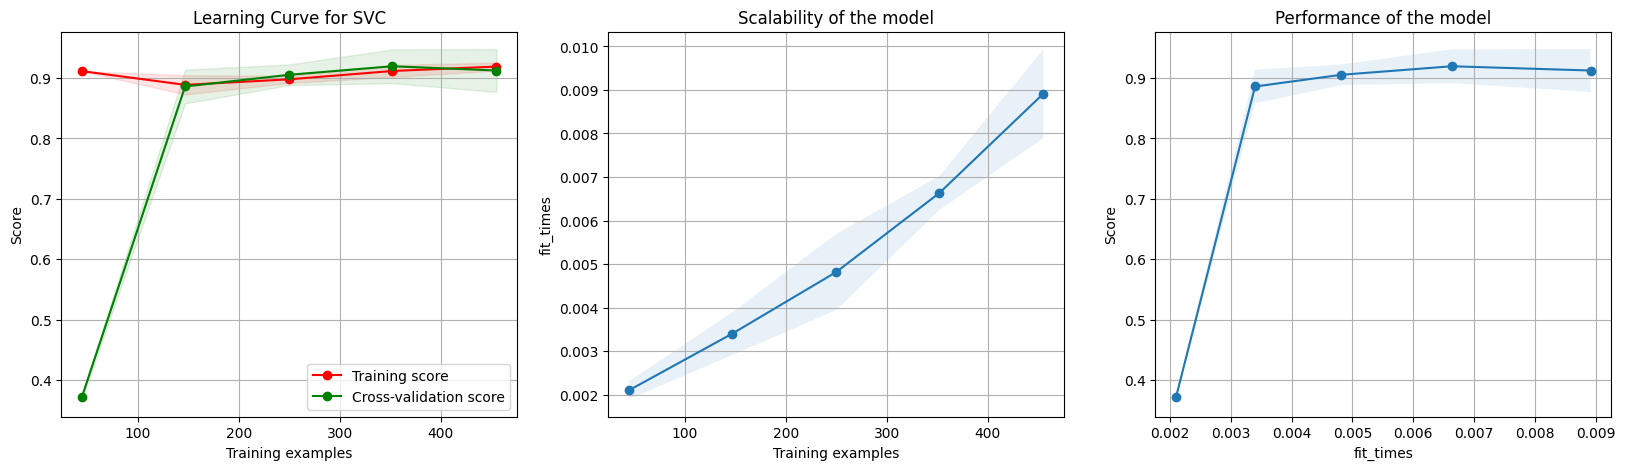

In [15]:
from sklearn.svm import SVC
from helpers import plot_learning_curve

# Importing additional necessary libraries
import matplotlib.pyplot as plt
import numpy as np

svc_model = SVC()

# Plotting the learning curve using the plot_learning_curve function
plt.figure(figsize=(12, 8))
plot_learning_curve(estimator=svc_model, title="Learning Curve for SVC", X=X, y=y,
                    cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
plt.show()

Als het goed is, heb je nu hierboven drie grafieken staan. Bedenk op basis van deze visualisatie hoe goed of hoe slecht je vindt dat je *classifier* werkt.

Experimenteer vervolgens met verschillende waarden voor de parameters van die `SVC`: verander de kernel en verhoog (als je kernel `poly` is) de `degree`.  Welke verschillen zie je in de visualisatis? Kun je op basis hiervan een voorstel doen voor de beste waarden voor die parameters?

Maak gebruik van [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) om de data op te splitsen in tachtig procent trainingsdata en twintig procent testdata.

Train een `SVC` op basis van de beste parameters die je hierboven hebt geïdentificeerd. Maak vervolgens een [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) en een [classificatie-raport](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) op basis van de testdata met dit model. Maak tenslotte [een ROC-curve](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) van dit getrainde model. 

Geef op basis hiervan een analyse van de kwaliteit van het model en een advies over hoe het model eventueel te verbeteren zou zijn.

In [28]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Check de training score
training_score = svc.score(X_train, y_train)

# Check de testing score
testing_score = svc.score(X_test, y_test)

training_score, testing_score

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


(0.9142857142857143, 0.9473684210526315)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
# YOUR CODE HERE


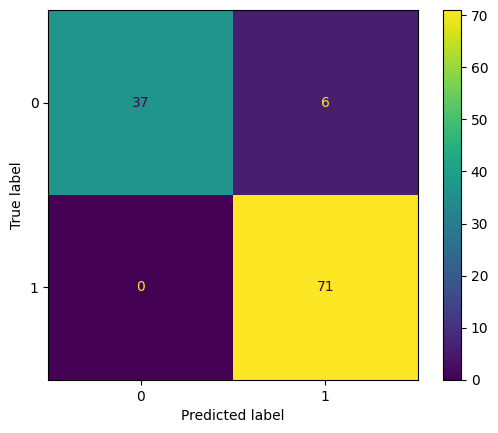

In [32]:
# Plot een confusion-matrix.
# Maak gebruik van de klasse ConfusionMatrixDisplay die hierboven is geïmporteerd
# YOUR CODE HERE

# Predicting the labels for the test set
y_pred = svc.predict(X_test)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a classification report
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



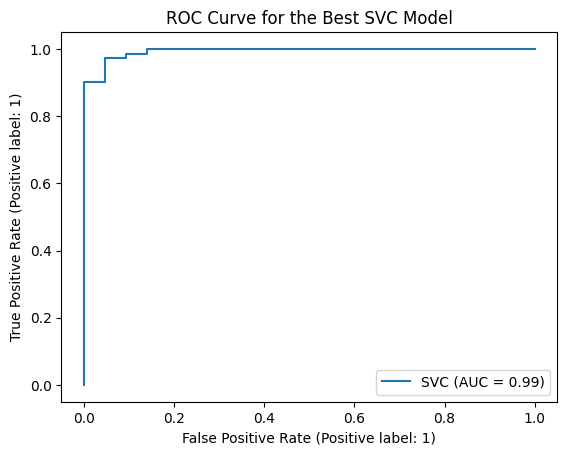

In [31]:
# Plot een ROC-curve.
# Maak gebruik van de klasse RocCurveDisplay die hierboven is geïmporteerd
# YOUR CODE HERE
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Plotting the ROC curve
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.title("ROC Curve for the Best SVC Model")
plt.show()


## Opdracht 2

Maak en train nu verschillende andere typen *classifiers* (een aantal is hieronder gegeven, maar voel je vrij om een andere set te gebruiken). Let op: alle *classifiers* in sklearn implementeren dezelfde interface: maak hiervan gebruik in je realisatie.

In de cel hieronder wordt een *DataFrame* `result_table` gedefinieerd. Het is de bedoeling dat je van alle *classifiers* die je gebruikt en traint de `fpr`, de `tpr` en de `auc` in dit *DataFrame* opslaat. Je kunt hiervoor gebruik maken van de sklearn-methoden [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) en [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). 

In [37]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# DataFrame om de gevonden metrieken per classifier in op te slaan.
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = {'Logistic Regression': LogisticRegression(max_iter=10000), 
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'K-Nearest Neighbors': KNeighborsClassifier(),
               'Support Vector Classifier': SVC(kernel='rbf', probability=True)}

# Training the classifiers and storing the performance metrics in the result_table DataFrame
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    yproba = classifier.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Display the result_table DataFrame with fpr, tpr, and auc for each classifier
result_table

[LogisticRegression(random_state=42), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42)]


c:\Users\colin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'DataFrame' object has no attribute 'append'

In de cel hieronder wordt de variabele `result_table` gebruikt om de verschillende ROC's in één figuur te plotten. Je hoeft hiervoor niks te programmeren; als je de cel runt krijgt je als het goed is direct de juiste visualisatie. 

Kun je op basis van deze visualisatie een uitspraak doen over welk model de beste performance heeft voor deze dataset? 

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label=f"{i}, AUC={result_table.loc[i]['auc']:.3f}")
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()